In [132]:
import os
import re
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

%matplotlib inline

In [133]:
news_dir = r'C:\Users\yasuh\OneDrive\datamix\integration\data\news\wsj_news'
news_file = r'wsj_news_fmt.csv'

stockprice_dir = r'C:\Users\yasuh\OneDrive\datamix\integration\data\stock'
stockprice_file = r'stock_price.csv'


section_keywords = ['Markets']
type_keywords = []
type_unkeywords = [
    'abreast of the market', 'asia markets', 'europe markets','financial inclusion',
    'financial regulation', 'financial regulation research', 'foreign exchange', 'fx horizons',
    'hedge funds', 'ipos', 'journal reports: funds & etfs', 'journal reports: wealth management',
    'moneybeat', 'pro pe deals', 'pro pe fund news', 'pro pe legal reulatory',
    'pro vc commentary analysis', 'pro vc industry news', 'pro vc ma ipos',
    'pro vc people', 'pro vc snapshot', 'property report', 'tax report', "the opeple's money",
    'wealth management', 'wealth management journal', 'weekend investor'
]

In [134]:
def contain_keywords(x):
    for key in keywords[ticker]:
        if key is None:
            pass
        elif key in str(x):
            return True
    return False


def news_classifier(x):
    for key in sector_keywords:
        if key in str(x):
            return 1.0
    return 0


def contain_section_keywords(x):
    for key in section_keywords:
        if key in str(x):
            return True
    return False

def contain_type_keywords(x):
    for key in type_unkeywords:
        if key in str(x):
            return False
    return True

def historical_volatility(x):
    logret = np.diff(np.log(x))
    return np.sqrt(260 * logret.var())


def Categorize_Z_Score(x):
    if x >= 1.0:
        return 1
    elif x > -1:
        return 0
    else:
        return -1
    

def bughunt1(x):
    if len(str(x)) < 10:
        return True
    else:
        return False

In [135]:
# ニュース記事のロード
allnews = pd.read_csv(os.path.join(news_dir, news_file))

(46365, 5)


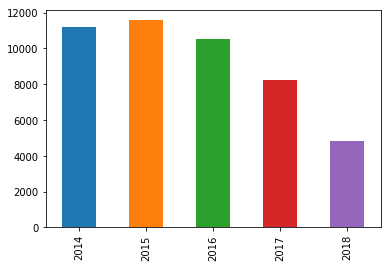

In [136]:
news = allnews[allnews.section.apply(contain_section_keywords)==True]
#news = news[news.type.apply(contain_type_keywords)==True]
news = news[['effective_time_EST', 'title', 'type', 'section', 'keyword', 'summary']]
news = news.rename(columns={'effective_time_EST':'date'})
news.date = pd.to_datetime(news.date)
news.set_index('date', inplace=True)
news.index = pd.to_datetime(news.index.strftime('%Y/%m/%d'))
news =news[news.summary.apply(bughunt1)!=True]
print(news.shape)
news.groupby([news.index.year]).count()['summary'].plot(kind='bar')

In [137]:
# stock priceのロード
hp = pd.read_csv(os.path.join(stockprice_dir, stockprice_file))
hp = hp.rename(columns={'Date':'date'})
hp.date = pd.to_datetime(hp.date)
hp.set_index('date', inplace=True)

In [139]:
keywords = {
    'AAPL':['aapl','apple',],
    'FB':  ['facebook',],
    'AMZN':['amzn', 'amazon',],
    'GOOG':['goog', 'google',],
    'NVDA':['nvda', 'nvidia',],
    'GILD':['gild', 'gilead',],
    'AAL': ['american airlines', 'airline'],
    'CAT': ['caterpillar',],
    'KO':  ['coca', 'cola', 'pepsi'],
    'MCD': ['mcdonald', ] 
           }

keywords = {
    'GOOG':['goog', 'googl','alphabet',],
    'FB':  ['facebook',],
    'TWTR':['twtr', 'twitter',],
    'TRIP':['trip advisor', 'tripadvisor',]
           }
#tech sector
keywords = {
    'ACN': [None, 'accenture'],
    'ADBE': ['adbe', 'adobe systems'],
    'AMD': [None, 'advanced micro devices'],
    'AKAM': ['akam', 'akamai technologies'],
    'ADS': [None, 'alliance data systems'],
    'APH': [None, 'amphenol'],
    'ADI': [None, 'analog devices'],
    'ANSS': ['anss', 'ansys'],
    'AAPL': ['aapl', 'apple'],
    'AMAT': ['amat', 'applied materials'],
    'ADSK': ['adsk', 'autodesk'],
    'ADP': [None, 'automatic data processing'],
    'AVGO': ['avgo', 'broadcom'],
    'BR': [None, 'broadridge financial solutions'],
    #'CDNS': ['cdns', 'cadence design'],
    'CSCO': ['csco', 'cisco'],
    'CTXS': ['ctxs', 'citrix'],
    'CTSH': ['ctsh', 'cognizant technology'],
    'GLW': [None, 'corning'],
    #'DXC': [None, 'dxc technology'],
    'FFIV': ['ffiv', 'f5 networks'],
    'FIS': [None, 'fidelity national information services'],
    'FISV': ['fisv', 'fiserv'],
    'FLT': [None, 'fleetcor technologies'],
    'FLIR': ['flir', 'flir systems'],
    'IT': [None, 'gartner'],
    'GPN': [None, 'global payments'],
    'HPE': ['hpe', 'hewlett packard enterprise'],
    'HPQ': ['hpq', 'hp'],
    'INTC': ['intc', 'intel'],
    'IBM': ['ibm', 'international business machines'],
    'INTU': ['intu', 'intuit'],
    #'IPGP': ['ipgp', 'ipg photonics'],
    'JNPR': ['jnpr', 'juniper networks'],
    'KLAC': ['klac', 'kla-tencor'],
    'LRCX': ['lrcx', 'lam research'],
    'MA': [None, 'mastercard'],
    'MCHP': ['mchp', 'microchip technology'],
    'MU': ['micron', 'micron technology'],
    'MSFT': ['msft', 'microsoft'],
    'MSI': ['motorola', 'motorola solutions'],
    'NTAP': ['ntap', 'netapp'],
    'NVDA': ['nvda', 'nvidia'],
    'ORCL': ['orcl', 'oracle'],
    'PAYX': ['payx', 'paychex'],
    'PYPL': ['pypl', 'paypal'],
    'QRVO': ['qrvo', 'qorvo'],
    'QCOM': ['qcom', 'qualcomm'],
    'RHT': ['rht', 'red hat'],
    'CRM': ['sales force', 'salesforce'],
    'STX': ['seagate', 'seagate technology'],
    'SWKS': ['swks', 'skyworks', 'skyworks'],
    'SYMC': ['symc', 'symantec'],
    'SNPS': ['snps', 'synopsys'],
    'TEL': [None, 'te connectivity'],
    'TXN': [None, 'texas instruments'],
    #'TSS': [None, 'total system services'],
    'VRSN': ['vrsn', 'verisign'],
    'V': [None, 'visa'],
    'WDC': [None, 'western digital'],
    'WU': [None, 'western union'],
    'XRX': [None, 'xerox'],
    'XLNX': ['xlnx', 'xilinx']
}

tickers = list(keywords.keys())

In [140]:
sector_keywords = []
for ticker, values in keywords.items():
    for value in values:
        if not value == None:
            sector_keywords.append(value)

In [141]:
alltexts = list(news.summary)
#sector_keywordsが含まれてるかどうかで1, 0に判別する。chi-squared値の算出に用いる
y_alltext = np.array(news.summary.apply(news_classifier)).reshape(-1,)
idx = news.index

# train-test split
train_idx = sum([1 for i, ix in enumerate(idx) if str(ix) < '2017-01-01'])
test_idx = sum([1 for i, ix in enumerate(idx) if str(ix) < '2018-03-26'])

alltext_train = alltexts[:train_idx]
alltext_test = alltexts[train_idx:test_idx]
y_alltext_train = y_alltext[:train_idx]
y_alltext_test = y_alltext[train_idx:test_idx]

#print(ticker)
print('alltext_train size: {}'.format(len(alltext_train)))
print('alltext_test size: {}'.format(len(alltext_test)))
print('y_alltext_train size: {}'.format(len(y_alltext_train)))
print('y_alltext_test size: {}'.format(len(y_alltext_test)))

alltext_train size: 33324
alltext_test size: 9906
y_alltext_train size: 33324
y_alltext_test size: 9906


In [142]:
# stop words 

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk
from nltk.corpus import stopwords

nltk_stop_words = stopwords.words('english')
prepositions = ['the', 'an', 'to', 'and', 'in', 'for', 'it', 'of', 'at', 'as', 'by',
                'said', 'say', 'company', 'corp']

stop_words = ENGLISH_STOP_WORDS.union(nltk_stop_words).union(prepositions)
#print(sorted(stopwords))

In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                             stop_words=stop_words)
#vectorizer.fit(text_train)
X_alltext_train = vectorizer.fit_transform(alltext_train)
#X_test = vectorizer.transform(text_test)
feature_names = vectorizer.get_feature_names()

print('Naive TF-IDF')
print(len(feature_names))
print(feature_names[:100])

ch2 = SelectKBest(chi2, k=200)
X_alltext_train = ch2.fit_transform(X_alltext_train, y_alltext_train)
#X_test = ch2.transform(X_test)
if feature_names:
    # keep selected feature names
    feature_names = [feature_names[i] for i
                     in ch2.get_support(indices=True)]

print('Chi-squred filtered TF-IDF')
print(len(feature_names))
print(feature_names[:100])

Naive TF-IDF
22274
['00', '000', '000th', '015', '019', '02', '025', '03', '04', '046', '049', '05', '053', '0541', '056', '06', '065', '066', '067', '068', '069', '07', '070', '075', '078', '079', '08', '081', '083', '0872', '089', '09', '090', '094', '096', '10', '100', '101', '102', '103', '1031', '104', '1040x', '105', '106', '107', '10731', '108', '109', '1099', '10b5', '10th', '11', '110', '11098', '111', '112', '113', '1136', '114', '115', '1159', '116', '117', '118', '1182', '1184', '119', '11th', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '1283', '129', '12b', '12th', '12½', '13', '130', '1314', '132', '133', '134', '135', '136', '137', '138', '139', '13f', '13th', '14', '140', '141']
Chi-squred filtered TF-IDF
200
['4g', '6s', 'aah', 'abhay', 'accelerator', 'ajay', 'altera', 'amateur', 'amateurs', 'apple', 'archpoint', 'assembles', 'asserts', 'augmented', 'ax', 'backpage', 'banga', 'baseband', 'beats', 'bhp', 'billings', 'billiton', 'broadcom', 'buse

In [144]:
# ticker毎に対象とするニュース、株価データを取得

news_dfs = {}
stock_dfs = {}

for ticker in tickers:
    #print('Processing {}...'.format(ticker))

    #print('Preparing stock data...')
    ticker_price = hp[[ticker]]
    ticker_price['vol_260d'] = ticker_price[ticker].rolling(260).apply(historical_volatility)
    ticker_price['chg_1d'] = ticker_price[ticker].pct_change()
    ticker_price['z_score'] = ticker_price.chg_1d / (ticker_price.vol_260d / np.sqrt(260))
    ticker_price['return_category'] = ticker_price.z_score.apply(Categorize_Z_Score)
    ticker_price = ticker_price.dropna()
    stock_dfs[ticker] = ticker_price.copy()

    #print('Preparing news data...')
    ticker_news = news[news.summary.apply(contain_keywords)]
    ticker_news = pd.merge(ticker_news, ticker_price, how='inner', left_index=True, right_index=True)
    ticker_news['Ticker'] = ticker
    ticker_news = ticker_news.rename(columns={ticker:'Close'})
    news_dfs[ticker] = ticker_news.copy()


C:\Users\yasuh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  # This is added back by InteractiveShellApp.init_path()
C:\Users\yasuh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\yasuh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

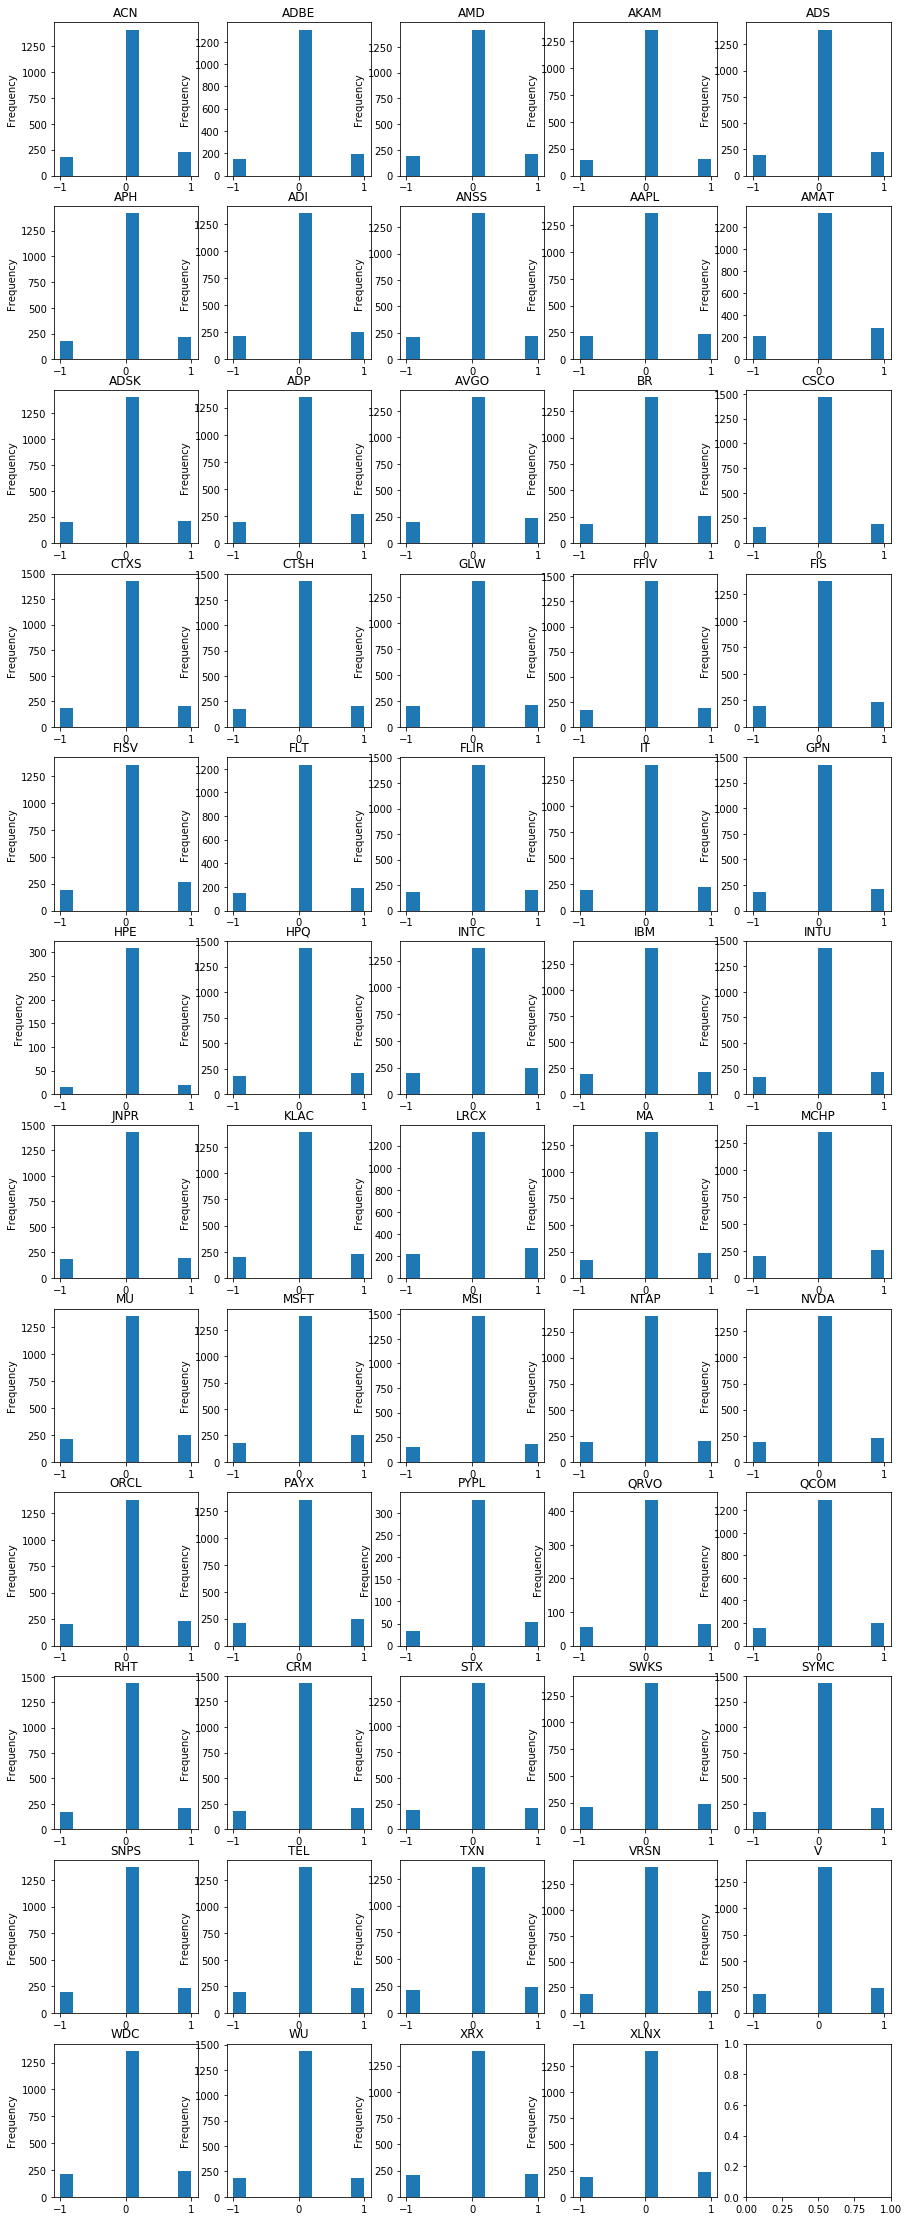

In [145]:
ncols = 5
nrows = math.ceil(len(tickers) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,40))

for i, ticker in enumerate(tickers):
    m = math.floor(i / ncols)
    n = i - (m * ncols)
    stock_dfs[ticker].return_category.plot(ax=axes[m, n], kind='hist')
    axes[m, n].set_title(ticker)

In [146]:
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
df = pd.DataFrame()

for ticker in tickers:
    df = df.append(news_dfs[ticker])
    df = df.sort_index()

idx = df.index
texts = list(df.summary)
y = np.array(df['return_category']).reshape(-1,)
texts = [text.replace('.', ' .') for text in texts]

In [148]:
# train-test split
train_idx = sum([1 for i, ix in enumerate(idx) if str(ix) < '2017-01-01'])
test_idx = sum([1 for i, ix in enumerate(idx) if str(ix) < '2018-03-26'])

text_train = texts[:train_idx]
text_test = texts[train_idx:test_idx]
y_train = y[:train_idx]
y_test = y[train_idx:test_idx]

#print(ticker)
print('text_train size: {}'.format(len(text_train)))
print('text_test size: {}'.format(len(text_test)))
print('y_train size: {}'.format(len(y_train)))
print('y_test size: {}'.format(len(y_test)))

text_train size: 690
text_test size: 297
y_train size: 690
y_test size: 297


In [159]:
pipe = make_pipeline(
    TfidfVectorizer(min_df=5, stop_words=stop_words, norm=None), 
    #vect,
    #ch2,
    RandomForestClassifier()
)
X_train = vectorizer.fit_transform(text_train)
X_train = ch2.fit_transform(X_train, y_train)

X_test = vectorizer.fit_transform(text_test)
X_test = ch2.fit_transform(X_test, y_test)

param_grid = {
        'randomforestclassifier__n_estimators':[20,], 
        'randomforestclassifier__max_features':[ 20,],
        'randomforestclassifier__max_depth':[16],
        #'randomforestclassifier__n_estimators':[15], 
        #'randomforestclassifier__max_features':[8, 10, 12],
        #'randomforestclassifier__max_depth':[64,],
        'tfidfvectorizer__ngram_range': [(1, 3)]
        #'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]
    }
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

pred_train = grid.predict(text_train)
print("Train data")
print("Accuracy: {:.3f}".format(accuracy_score(y_train, pred_train)))
print("Confusion matrix:\n{}\n".format(confusion_matrix(y_train, pred_train)))

pred_test = grid.predict(text_test)
print("Test data")
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred_test)))
print("Confusion matrix:\n{}\n".format(confusion_matrix(y_test, pred_test)))

Best cross-validation score: 0.67
Best parameters:
{'randomforestclassifier__max_depth': 16, 'randomforestclassifier__max_features': 20, 'randomforestclassifier__n_estimators': 20, 'tfidfvectorizer__ngram_range': (1, 3)}
Train data
Accuracy: 0.757
Confusion matrix:
[[ 32  73   0]
 [  0 464   0]
 [  0  95  26]]

Test data
Accuracy: 0.710
Confusion matrix:
[[  2  37   2]
 [  1 208   4]
 [  0  42   1]]



In [152]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_byidf = max_value.argsort()

# 特徴量名を取得
feature_names = np.array(vectorizer.get_feature_names())
#重要度の高い特徴量
print("Features with lowest tfidf:\n{}\n".format(
    feature_names[sorted_byidf[:50]]))
#重要度の低い特徴量
print("Features with highest tfidf:\n{}".format(
    feature_names[sorted_byidf[-50:]]))

Features with lowest tfidf:
['iphone' 'stock' 'quarter' 'visa mastercard' 'francisco' 'sales'
 'san francisco' 'san' 'companies' 'deal' 'maker' 'latest' 'bhp' 'cloud'
 'intel' 'billiton' 'plans' 'bhp billiton' 'results' 'big' 'china'
 'technology' 'dramatic' 'banks' 'global' 'pay' 'help' 'profit'
 'according' 'revenue' 'wednesday' 'record' 'country' 'thursday' 'world'
 'tuesday' 'network' 'largest' 'based' 'recent' 'dramatically' 'people'
 'buy' 'strong' 'make' 'grapple' 'data' 'helped' 'apple' 'higher']

Features with highest tfidf:
['merchants' 'high' 'lower' 'ahead' 'capital' 'software' 'executive'
 'tech' 'mobile' 'rates' 'paypal' 'firm' 'new' 'services' 'central' 'week'
 'debit' 'fund' 'report' 'systems' 'fees' 'low' 'firms' 'sale' 'group'
 'canada' 'stores' 'wells' 'samsung' 'watch' 'tax' 'exchange' 'morgan'
 'hedge' 'economic' 'buying' 'way' 'huge' 'boom' 'currencies' 'city'
 'hedge fund' 'microsoft' 'offered' 'ipad' 'event' 'political' 'partner'
 'month' 'canadian']


In [153]:
#高頻度で出現する単語トップ100.
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['apple' 'visa' 'investors' 'new' 'mastercard' 'year' 'growth' 'business'
 'market' 'iphone' 'stock' 'card' 'quarter' 'billion' 'microsoft' 'credit'
 'visa mastercard' 'earnings' 'francisco' 'sales' 'san' 'san francisco'
 'companies' 'financial' 'deal' 'bank' 'payments' 'giant' 'chip' 'shares'
 'prices' 'maker' 'bhp' 'cloud' 'latest' 'payment' 'intel' 'plans'
 'billiton' 'bhp billiton' 'results' 'oil' 'china' 'big' 'markets'
 'technology' 'dramatic' 'banks' 'chief' 'million' 'street' 'global'
 'time' 'cards' 'pay' 'help' 'credit card' 'according' 'profit' 'price'
 'high' 'merchants' 'revenue' 'wednesday' 'bond' 'world' 'record'
 'country' 'thursday' 'lower' 'tuesday' 'based' 'largest' 'network'
 'ahead' 'capital' 'dramatically' 'recent' 'software' 'data' 'grapple'
 'people' 'tech' 'executive' 'helped' 'strong' 'make' 'buy' 'second'
 'higher' 'years' 'international' 'ibm' 'gains' 'federal' 'familiar'
 'chip maker' 'expected' 'european' 'likely']


In [161]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["randomforestclassifier"].feature_importances_,
    feature_names, n_top_features=30)

ValueError: Number of coefficients 533 doesn't match number offeature names 200.

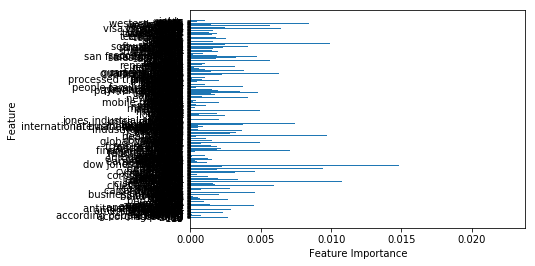

In [155]:
#もうちょっと何とかしないと、人が見れません。

def plot_feature_importances(grid, text_train):
    '''
    vect = CountVectorizer instance
    data = vect.transform(text_train)
    grid = GridSearchCV(pipe, param_grid)
    '''
    vect = grid.best_estimator_.named_steps["tfidfvectorizer"]
    x_train = vect.transform(text_train)
    n_features = x_train.shape[1]
    feature_names = vect.get_feature_names()
    plt.barh(
        range(n_features), 
        grid.best_estimator_.named_steps['randomforestclassifier'].feature_importances_, 
        align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")

plot_feature_importances(grid, text_train)

In [156]:
grid.best_estimator_.named_steps['randomforestclassifier'].feature_importances_

array([5.18732432e-03, 2.66207166e-03, 6.89068880e-05, 0.00000000e+00,
       4.55275833e-05, 1.92514703e-05, 7.75168940e-04, 9.75525913e-04,
       5.04944136e-03, 1.31936847e-04, 5.74559916e-04, 1.88250115e-03,
       5.83919717e-04, 9.91777543e-04, 2.29085361e-03, 5.05320027e-04,
       1.76465774e-03, 0.00000000e+00, 1.65279742e-03, 1.58103247e-03,
       1.90098152e-03, 1.16755083e-02, 2.85818670e-03, 2.98042356e-04,
       0.00000000e+00, 0.00000000e+00, 6.07475569e-04, 6.21398263e-03,
       0.00000000e+00, 7.14179072e-03, 0.00000000e+00, 1.21584600e-03,
       6.47259070e-05, 4.52455181e-03, 0.00000000e+00, 7.73923391e-03,
       1.42332876e-03, 1.39204015e-03, 0.00000000e+00, 2.28853952e-04,
       0.00000000e+00, 0.00000000e+00, 2.16450095e-03, 2.18964202e-03,
       9.33223010e-04, 1.01903599e-03, 2.30273579e-03, 8.13397860e-04,
       5.89893368e-04, 2.69179331e-03, 2.12686263e-03, 1.63036139e-03,
       7.14380086e-04, 4.76516931e-06, 2.25096216e-03, 5.71035599e-04,
      